# Query data
TermQuery(vulnerability,cve,exploit)
range(2014/01/01 - 2014/12/31)

In [355]:
import pyes
import elasticsearch
import json
%matplotlib inline
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sb
import time
import pandas as pd

es_address='140.118.207.18:9200'
conn = pyes.es.ES(es_address)
counter = 0
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()

tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="cve")
tq3 = pyes.query.TermQuery(field="text", value="exploit")
ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:00 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq1)
bq.add_should(tq2)
bq.add_should(tq3)
bq.add_must(rq)

result_tweet = conn.search(query=bq , indices='twitter2' , doc_types='tweet')


#tagg_tweet = pyes.aggs.TermsAgg('created_at', field='created_at',size=10000)
#qsearch_tweet = pyes.query.Search(bq)
#qsearch_tweet.agg.add(tagg_tweet)

#result_tweet = conn.search(query=qsearch_tweet , indices='twitter2' , doc_types='tweet')
#print result_tweet[0]['user']['name']
#print json.dumps(result_tweet.aggs,indent=2)


# Question 2 a. b. number of twitters,tweets

In [356]:
month_tweets = []
month_twitter = []
url = 0
url_null = 0

for tweet in result_tweet:
    month_tweets.append(int(time.strftime("%m",time.strptime(tweet["created_at"],'%a %b %d %H:%M:%S +0000 %Y')))) 
    month_twitter.append(tweet["user"]["name"])
    if tweet['entities']['urls'] == []:
        url_null +=1
    else:
        url += 1

month_twitters = pd.DataFrame({"month":month_tweets,"name":month_twitter})
sub_month_twitters = month_twitters[['month','name']].drop_duplicates()
user = month_twitters['name'].drop_duplicates()
user = user.reset_index(drop=True)
print 'tweets',len(result_tweet)
print 'twitters',len(user),'\n'

#print month_tweets,month_twitter

tweets 1421
twitters 83 



# Question 2 c. d. e. plot histogram of tweets and twitters in every month and URL pie 

1160 261
URL and URL_null 圓餅圖


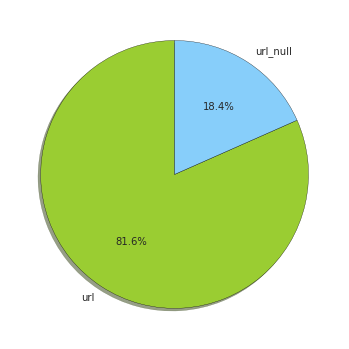

每個月參與議題的Twitters長條圖


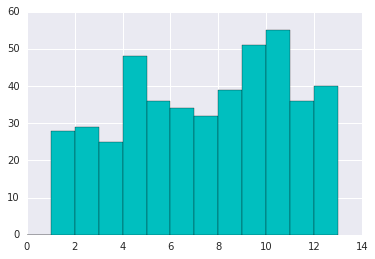

每個月符合議題的Tweets長條圖


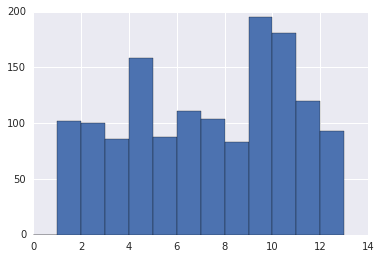

In [357]:
print url,url_null
fig = plt.figure(1, figsize=(6,6))
sizes = [url,url_null]
labels = 'url', 'url_null'
colors = ['yellowgreen', 'lightskyblue']
print 'URL and URL_null 圓餅圖'
plt.pie(sizes,labels=labels,colors=colors,
        autopct='%1.1f%%',radius=1, shadow=True, startangle=90)
plt.show()

bins = np.arange(0,14,1)
print '每個月參與議題的Twitters長條圖'
sub_month_twitters['month'].hist(bins = bins,color = 'c')
plt.show()
print '每個月符合議題的Tweets長條圖'
month_twitters['month'].hist(bins = bins)
plt.show()


In [358]:
for i in range(1,13):
    print len(sub_month_twitters.loc[month_twitters['month'] == i])
print '\n'
for i in range(1,13):
    print len(month_twitters.loc[month_twitters['month'] == i])

28
29
25
48
36
34
32
39
51
55
36
40


102
100
86
158
88
111
104
83
195
181
120
93


# Just Query CVE

In [359]:
bq2 = pyes.query.BoolQuery()
bq2.add_should(tq2)
bq2.add_must(rq)
result_tweet = conn.search(query=bq2 , indices='twitter2' , doc_types='tweet')
print len(result_tweet)


265


In [360]:
month_tweets_cve = []
month_twitter_cve = []
url_cve = 0
url_null_cve = 0
for tweet in result_tweet: 
    month_tweets_cve.append(int(time.strftime("%m",time.strptime(tweet["created_at"],'%a %b %d %H:%M:%S +0000 %Y')))) 
    month_twitter_cve.append(tweet["user"]["name"])
    if tweet['entities']['urls'] == []:
        url_null_cve +=1
    else:
        url_cve += 1
month_twitters_cve = pd.DataFrame({"month":month_tweets_cve,"name":month_twitter_cve})

In [361]:
print len(month_twitters_cve)

265


In [362]:
user_cve = month_twitters_cve['name'].drop_duplicates()
user_cve = user_cve.reset_index(drop=True)

matrix_cve=[]
for i in range(0,12):
    matrix_cve.append([0.0]*len(user_cve))

for i in range(0,len(user_cve)):
    for m in range(1,13):
        for n in range(0,len(month_twitters_cve)):
            if (month_twitters_cve['month'][n] == m)& (month_twitters_cve['name'][n] == user_cve[i]):
                #print m,user_cve[i]
                matrix_cve[m-1][i]+=1

matrix_cve = np.matrix(matrix_cve)
matrix_cve = matrix_cve.T


# Quertion 2 f. plot box-plot of each month 

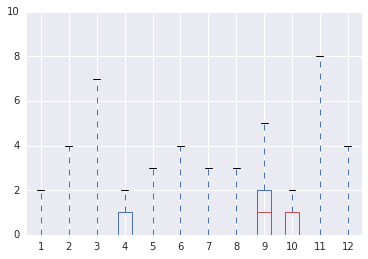

In [363]:
users_cve = []
for i in user_cve:
    users_cve.append(str(i))

month_tweets_twitters_cve = pd.DataFrame(matrix_cve,columns=['1','2','3','4','5','6','7','8','9','10','11','12'])

month_tweets_twitters_cve['name'] = pd.DataFrame(users_cve)

month_tweets_twitters_cve = month_tweets_twitters_cve.drop("name",1)

month_tweets_twitters_cve.boxplot(return_type='axes')

# Quertion 3 

In [364]:
import pyes
import elasticsearch
import json
%matplotlib inline
import numpy as np
import random
from matplotlib import pyplot as plt
import time

es_address='140.118.207.18:9200'
conn = pyes.es.ES(es_address)
counter = 0
bq = pyes.query.BoolQuery() 
#q = pyes.query.MatchAllQuery()

tq1 = pyes.query.TermQuery(field="text", value="vulnerability")
tq2 = pyes.query.TermQuery(field="text", value="cve")
tq3 = pyes.query.TermQuery(field="text", value="exploit")
ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 01 00:00:00 +0000 2014", to_value="Wed Dec 31 23:59:00 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq1)
bq.add_should(tq2)
bq.add_should(tq3)
bq.add_must(rq)

result_tweet = conn.search(query=bq , indices='twitter2' , doc_types='tweet')


In [365]:
month_twitter = []
text = []
for tweet in result_tweet:
    month_twitter.append(tweet["user"]["name"])
    text.append(tweet["text"])
    
month_twitters = pd.DataFrame({"name":month_twitter,"text":text})

# Calculate every twitters post number of tweets related security keywords CVE, Vulnerability, Exploit 

In [366]:
import re
m = re.search('multi', 'A mUltiCased string', re.IGNORECASE)

user = month_twitters['name'].drop_duplicates()
user = user.reset_index(drop=True)
matrix=[]
for i in range(0,3):
    matrix.append([0.0]*len(user))
Querystr = ['cve','vulnerability','exploit']
cve = 0
vulnerability = 0
exploit = 0

for i in range(0,len(user)):
    for n in range(0,len(result_tweet)):
        #print n
        if ((bool(re.search('cve',month_twitters['text'][n], re.IGNORECASE)))&
        (month_twitters['name'][n] == user[i])):
                #print m,user_cve[i]
            matrix[0][i]+=1
        if ((bool(re.search('vulnerability',month_twitters['text'][n], re.IGNORECASE)))& 
        (month_twitters['name'][n] == user[i])):
                #print m,user_cve[i]
            matrix[1][i]+=1
        if ((bool(re.search('exploit',month_twitters['text'][n], re.IGNORECASE)))& 
        (month_twitters['name'][n] == user[i])):
                #print m,user_cve[i]
            matrix[2][i]+=1

matrix = np.matrix(matrix)
matrix = matrix.T
month_twitters_words = pd.DataFrame(matrix,columns=['cve','vulnerability','exploit'])
month_twitters_words.head(100)
#print matrix

,cve,vulnerability,exploit
0,23.0,36.0,27.0
1,43.0,88.0,76.0
2,10.0,9.0,7.0
3,3.0,0.0,4.0
4,42.0,38.0,35.0
5,4.0,74.0,35.0
6,5.0,36.0,31.0
7,10.0,17.0,1.0
8,10.0,17.0,18.0
9,2.0,28.0,13.0


# Determine the classes

In [367]:
classes = []
for i in range(0,len(month_twitters_words)):
    for c in month_twitters_words.columns:
        if month_twitters_words.ix[i][c] == (max(month_twitters_words["cve"][i],
                                             month_twitters_words["vulnerability"][i],
                                             month_twitters_words["exploit"][i])):
            classes.append(c)
month_twitters_words['class'] = pd.DataFrame(classes)
month_twitters_words.head(100)

,cve,vulnerability,exploit,class
0,23.0,36.0,27.0,vulnerability
1,43.0,88.0,76.0,vulnerability
2,10.0,9.0,7.0,cve
3,3.0,0.0,4.0,exploit
4,42.0,38.0,35.0,cve
5,4.0,74.0,35.0,vulnerability
6,5.0,36.0,31.0,vulnerability
7,10.0,17.0,1.0,vulnerability
8,10.0,17.0,18.0,exploit
9,2.0,28.0,13.0,vulnerability


# Filter 
month_twitters_words['cve'] >= 1 & <br / >
month_twitters_words['vulnerability'] >= 1 & <br / >
month_twitters_words['exploit'] >= 1

In [368]:
month_twitters_words['name'] = pd.DataFrame(user)

month_twitters_words = month_twitters_words.loc[(month_twitters_words['cve']>=1) &
                         (month_twitters_words['vulnerability']>=1) &
                         (month_twitters_words['exploit']>=1)
                          ]
month_twitters_words = month_twitters_words.reset_index(drop=True)


In [369]:
month_twitters_words.head(100)

,cve,vulnerability,exploit,class,name
0,23.0,36.0,27.0,vulnerability,Thierry Zoller
1,43.0,88.0,76.0,vulnerability,Virus Bulletin
2,10.0,9.0,7.0,cve,Mikko Hypponen
3,42.0,38.0,35.0,cve,Avram Marius
4,4.0,74.0,35.0,vulnerability,Threatpost
5,5.0,36.0,31.0,vulnerability,Mike_Mimoso
6,10.0,17.0,1.0,vulnerability,BillBrenner70
7,10.0,17.0,18.0,exploit,Tim Strazzere
8,2.0,28.0,13.0,vulnerability,Graham Cluley
9,5.0,9.0,7.0,vulnerability,Bill Gardner


# Classification using decision tree

In [370]:
all_inputs = month_twitters_words[['cve','vulnerability','exploit']].values
all_classes = month_twitters_words['class'].values

all_inputs[:5]
all_classes

array(['vulnerability', 'vulnerability', 'cve', 'cve', 'vulnerability',
       'vulnerability', 'vulnerability', 'exploit', 'vulnerability',
       'vulnerability', 'vulnerability', 'cve', 'exploit', 'exploit',
       'cve', 'exploit', 'vulnerability', 'vulnerability', 'exploit',
       'vulnerability', 'vulnerability', 'exploit', 'exploit', 'exploit',
       'vulnerability', 'exploit', 'vulnerability', 'cve', 'exploit',
       'vulnerability', 'exploit', 'exploit', 'vulnerability', 'exploit',
       'vulnerability', 'exploit', 'exploit', 'vulnerability',
       'vulnerability', 'exploit'], dtype=object)

In [371]:
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.66, random_state=1)
training_inputs


array([[  1.,   1.,   2.],
       [  2.,   8.,   2.],
       [  4.,  74.,  35.],
       [  9.,   7.,   6.],
       [  5.,  27.,  11.],
       [  1.,   3.,   2.],
       [  2.,   5.,   7.],
       [  2.,   4.,   4.],
       [  2.,   3.,   6.],
       [  2.,   5.,   2.],
       [  6.,   7.,   8.],
       [  4.,   1.,  30.],
       [ 10.,  17.,   1.],
       [  3.,   6.,  10.],
       [ 10.,  17.,  18.],
       [  1.,   2.,   3.],
       [ 43.,  88.,  76.],
       [ 10.,  22.,  18.],
       [ 23.,  36.,  27.],
       [  2.,   4.,   6.],
       [  5.,  36.,  31.],
       [  7.,   2.,   6.],
       [  5.,   9.,   7.],
       [  2.,  28.,  13.],
       [  5.,  12.,  22.],
       [  1.,   2.,   3.]])

In [372]:
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)
# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.5714285714285714

[0.5, 0.5714285714285714, 0.42857142857142855, 0.5, 0.42857142857142855, 0.5, 0.5714285714285714, 0.42857142857142855, 0.6428571428571429, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.5, 0.7142857142857143, 0.21428571428571427, 0.7142857142857143, 0.6428571428571429, 0.5, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.35714285714285715, 0.6428571428571429, 0.5, 0.5714285714285714, 0.6428571428571429, 0.7142857142857143, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.6428571428571429, 0.5, 0.6428571428571429, 0.42857142857142855, 0.2857142857142857, 0.5, 0.5, 0.35714285714285715, 0.42857142857142855, 0.5714285714285714, 0.5, 0.6428571428571429, 0.5, 0.5714285714285714, 0.35714285714285715, 0.6428571428571429, 0.7857142857142857, 0.5714285714285714, 0.5714285714285714, 0.35714285714285715, 0.5714285714285714, 0.2857142857142857, 0.42857142857142855, 0.7142857142857143, 0.5, 0.5, 0.35714285714285715, 0.7142857142857143, 0.7142857142857143,

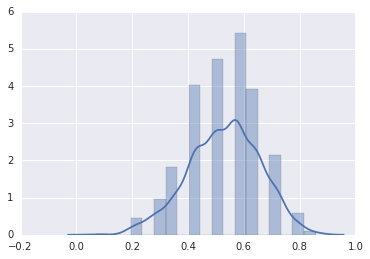

In [373]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.66)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
print model_accuracies
sb.distplot(model_accuracies)

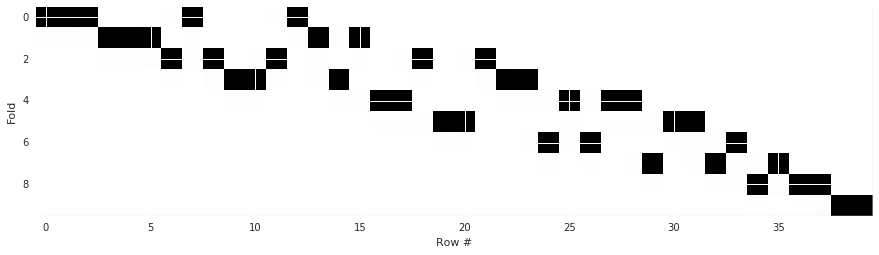

In [374]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

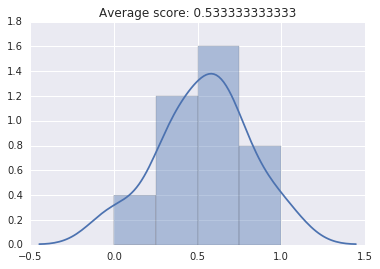

In [375]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [379]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.625
Best parameters: {'max_features': 3, 'max_depth': 5}


# Heatmap

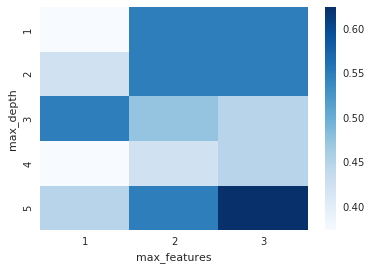

In [380]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')